Part 1: Minimum-Tracking-Error Frontier

Let the market return be the target return. 

 1. Estimate the expected deviation from market return, for the ten industry portfolios

 2. Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

 3. Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

    - This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.

    - This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

    - Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

 4. Calculate the information ratio and portfolio weights for the "tangency" portfolio.

Part 2: Minimum-Variance Frontier w/o Short Sales

 5. Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

 6. Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 105 data points.

 7. Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.
Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

 8. Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set risk free rate

rf=0

In [3]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx",index_col=0)

In [4]:
Market_Portfolio=pd.read_excel("Market_Portfolio.xlsx",index_col=0)

In [5]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [6]:
Market_Portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


# Part 1: Minimum-Tracking-Error Frontier

In [7]:
for i in Industry_Portfolio.columns:
    Industry_Portfolio[str(i)] = Industry_Portfolio[i].subtract(Market_Portfolio["Market"], fill_value=0)

In [8]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


## Expected deviation from market return

In [9]:
Industry_Portfolio.mean(axis=0)

NoDur    0.154750
Durbl   -0.014750
Manuf    0.264750
Enrgy    0.483083
HiTec    0.018167
Telcm    0.133333
Shops    0.168250
Hlth     0.035750
Utils    0.159083
Other   -0.259000
dtype: float64

## Covariance matrix of return deviation

In [10]:
Industry_Portfolio.cov()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [11]:
R=pd.DataFrame(data=Industry_Portfolio.mean(axis=0))

V=Industry_Portfolio.cov()

V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

e = pd.DataFrame(data=np.ones((Industry_Portfolio.shape[1], 1)), 
                 index=Industry_Portfolio.columns, 
                 columns=["Dummy"])

In [12]:
R

,0
NoDur,0.154750
Durbl,-0.014750
Manuf,0.264750
Enrgy,0.483083
HiTec,0.018167
Telcm,0.133333
Shops,0.168250
Hlth,0.035750
Utils,0.159083
Other,-0.259000


In [13]:
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [14]:
V_inv 

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.545383,0.045228,0.207945,0.278364,0.604681,0.153596,0.180488,0.190501,0.057465,0.759501
Durbl,0.045228,0.089652,-0.087449,0.038946,0.042978,0.006253,-0.000714,0.063052,0.027102,0.034553
Manuf,0.207945,-0.087449,1.139800,0.402051,1.056457,0.370595,0.577248,0.614377,0.304563,1.397908
Enrgy,0.278364,0.038946,0.402051,0.506498,0.953964,0.357385,0.462025,0.539515,0.189783,1.276576
HiTec,0.604681,0.042978,1.056457,0.953964,2.302373,0.743645,0.952973,1.159904,0.537593,2.841318
Telcm,0.153596,0.006253,0.370595,0.357385,0.743645,0.523995,0.330645,0.426827,0.118803,1.000794
Shops,0.180488,-0.000714,0.577248,0.462025,0.952973,0.330645,0.723155,0.534983,0.249115,1.283359
Hlth,0.190501,0.063052,0.614377,0.539515,1.159904,0.426827,0.534983,0.861345,0.272589,1.515965
Utils,0.057465,0.027102,0.304563,0.189783,0.537593,0.118803,0.249115,0.272589,0.304080,0.728516
Other,0.759501,0.034553,1.397908,1.276576,2.841318,1.000794,1.283359,1.515965,0.728516,3.950040


In [15]:
e

,Dummy
NoDur,1.0
Durbl,1.0
Manuf,1.0
Enrgy,1.0
HiTec,1.0
Telcm,1.0
Shops,1.0
Hlth,1.0
Utils,1.0
Other,1.0


In [16]:
# Compute Alpha
Alpha = (R.T @ V_inv @ e).values[0, 0]

# Compute Zeta
Zeta = (R.T @ V_inv @ R).values[0, 0]

# Compute Delta
Delta = (e.T @ V_inv @ e).values[0, 0]

In [17]:
# Compute 'a'
numerator_a1 = (Zeta * V_inv @ e)
numerator_a2 = (Alpha * V_inv @ R)
numerator_a = numerator_a1.values - numerator_a2.values
denominator_a = (Zeta * Delta) - Alpha**2
a = numerator_a / denominator_a

In [18]:
# Compute 'b'
numerator_b1 = (Delta * V_inv @ R)
numerator_b2 = (Alpha * V_inv @ e)
numerator_b = numerator_b1.values - numerator_b2.values
denominator_b = (Zeta * Delta) - Alpha**2
b = numerator_b / denominator_b

In [19]:
# Create the DataFrame with a range of portfolio RETURN DEVIATION as the index

returns_deviation_range = np.arange(0, 0.1, 0.001)
Minimum_tracking_error_frontier = pd.DataFrame(index=returns_deviation_range, columns=Industry_Portfolio.columns)

# Fill the DataFrame with weights based on the formula
for portfolio_return in returns_deviation_range:
    weights = a + b * portfolio_return
    Minimum_tracking_error_frontier.loc[portfolio_return, :] = weights.T

In [20]:
Minimum_tracking_error_frontier 

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0.000,0.049096,0.015288,0.012347,0.081558,0.221306,0.063292,0.04862,0.112529,0.066618,0.329346
0.001,0.049147,0.015071,0.014141,0.081636,0.220705,0.063404,0.049455,0.112389,0.066239,0.327813
0.002,0.049197,0.014854,0.015935,0.081715,0.220104,0.063515,0.050289,0.112249,0.06586,0.32628
0.003,0.049248,0.014638,0.017729,0.081793,0.219504,0.063627,0.051123,0.11211,0.065482,0.324747
0.004,0.049299,0.014421,0.019523,0.081872,0.218903,0.063738,0.051958,0.11197,0.065103,0.323214
...,...,...,...,...,...,...,...,...,...,...
0.095,0.05391,-0.005302,0.182788,0.089006,0.164229,0.073879,0.127888,0.09926,0.030625,0.183717
0.096,0.05396,-0.005519,0.184582,0.089084,0.163629,0.073991,0.128722,0.099121,0.030246,0.182184
0.097,0.054011,-0.005736,0.186376,0.089162,0.163028,0.074102,0.129557,0.098981,0.029868,0.180651
0.098,0.054062,-0.005952,0.18817,0.089241,0.162427,0.074213,0.130391,0.098841,0.029489,0.179118


In [21]:
# This is the expected return deviation for minimum tracking error portfolio

R_minimum_tracking_error=Alpha/Delta

In [22]:
# Variance for minimum tracking error portfolio

Variance_minimum_tracking_error=(1/Delta)
Variance_minimum_tracking_error

0.01707934509680095

In [23]:
# SD (Tracking error) for minimum tracking error portfolio

SD_minimum_tracking_error=np.sqrt(Variance_minimum_tracking_error)
SD_minimum_tracking_error

0.13068796844698807

In [24]:
# Information ratio for minimum tracking error portfolio

Information_ratio_minimum_tracking_error = (R_minimum_tracking_error-rf)/SD_minimum_tracking_error
Information_ratio_minimum_tracking_error

0.3831938362077653

In [25]:
# Lesson 2 Slide 12

# Weights for minimum tracking error portfolio

Weights_minimum_tracking_error=a+b*R_minimum_tracking_error

Weights_minimum_tracking_error_df = pd.DataFrame(data=Weights_minimum_tracking_error,
                                    index=Industry_Portfolio.columns,
                                    columns=["Weights_mv"])

Weights_minimum_tracking_error_df 

,Weights_mv
NoDur,0.051633
Durbl,0.004434
Manuf,0.102194
Enrgy,0.085484
HiTec,0.191218
Telcm,0.068873
Shops,0.090406
Hlth,0.105534
Utils,0.047645
Other,0.252578


In [26]:
Minimum_tracking_error_frontier["Variance"]=(1/Delta)+(Delta/(Zeta*Delta-Alpha**2))*(Minimum_tracking_error_frontier.index-R_minimum_tracking_error)**2
Minimum_tracking_error_frontier["SD"]=np.sqrt(Minimum_tracking_error_frontier["Variance"])

In [27]:
Minimum_tracking_error_frontier 

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Variance,SD
0.000,0.049096,0.015288,0.012347,0.081558,0.221306,0.063292,0.04862,0.112529,0.066618,0.329346,0.060388,0.245740
0.001,0.049147,0.015071,0.014141,0.081636,0.220705,0.063404,0.049455,0.112389,0.066239,0.327813,0.058676,0.242230
0.002,0.049197,0.014854,0.015935,0.081715,0.220104,0.063515,0.050289,0.112249,0.06586,0.32628,0.056998,0.238742
0.003,0.049248,0.014638,0.017729,0.081793,0.219504,0.063627,0.051123,0.11211,0.065482,0.324747,0.055354,0.235275
0.004,0.049299,0.014421,0.019523,0.081872,0.218903,0.063738,0.051958,0.11197,0.065103,0.323214,0.053746,0.231831
...,...,...,...,...,...,...,...,...,...,...,...,...
0.095,0.05391,-0.005302,0.182788,0.089006,0.164229,0.073879,0.127888,0.09926,0.030625,0.183717,0.051927,0.227874
0.096,0.05396,-0.005519,0.184582,0.089084,0.163629,0.073991,0.128722,0.099121,0.030246,0.182184,0.053495,0.231290
0.097,0.054011,-0.005736,0.186376,0.089162,0.163028,0.074102,0.129557,0.098981,0.029868,0.180651,0.055099,0.234731
0.098,0.054062,-0.005952,0.18817,0.089241,0.162427,0.074213,0.130391,0.098841,0.029489,0.179118,0.056736,0.238194


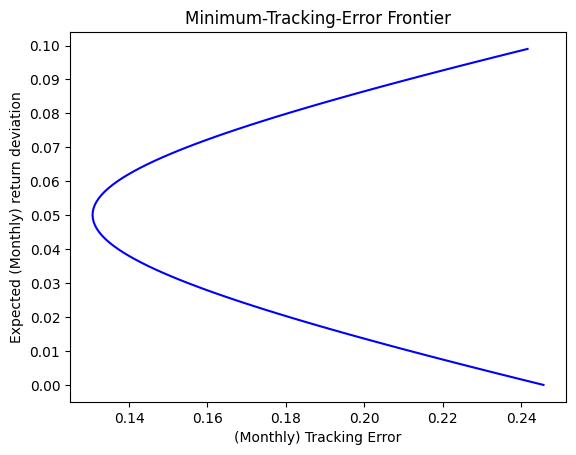

In [28]:
plt.plot(Minimum_tracking_error_frontier["SD"], Minimum_tracking_error_frontier.index, color='blue', linestyle='-')

#in increments of 0.1%
plt.yticks(np.arange(0, 0.11, 0.01))
plt.xlabel('(Monthly) Tracking Error')
plt.ylabel('Expected (Monthly) return deviation')
plt.title('Minimum-Tracking-Error Frontier')
plt.show() 

In [29]:
rf=0

In [30]:
# Note that the np.arrange is supposed to be portfolio Tracking Error (the x-axis)
Risk_free_line = rf + np.arange(0, 2, 0.001)*(Zeta-2*Alpha*rf+Delta*(rf**2))**0.5

In [31]:
Minimum_tracking_error_frontier["Riskless_Variance"]=((Minimum_tracking_error_frontier.index-rf)**2)/(Zeta - 2*Alpha*rf + Delta*(rf**2))
Minimum_tracking_error_frontier["Riskless_SD"]=np.sqrt(Minimum_tracking_error_frontier["Riskless_Variance"])
Minimum_tracking_error_frontier["Riskless_SD"] = (Minimum_tracking_error_frontier.index-rf)/np.sqrt(Zeta - 2*Alpha*rf + Delta*(rf**2))

In [32]:
Minimum_tracking_error_frontier 

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Variance,SD,Riskless_Variance,Riskless_SD
0.000,0.049096,0.015288,0.012347,0.081558,0.221306,0.063292,0.04862,0.112529,0.066618,0.329346,0.060388,0.245740,0.000000,0.000000
0.001,0.049147,0.015071,0.014141,0.081636,0.220705,0.063404,0.049455,0.112389,0.066239,0.327813,0.058676,0.242230,0.000005,0.002210
0.002,0.049197,0.014854,0.015935,0.081715,0.220104,0.063515,0.050289,0.112249,0.06586,0.32628,0.056998,0.238742,0.000020,0.004420
0.003,0.049248,0.014638,0.017729,0.081793,0.219504,0.063627,0.051123,0.11211,0.065482,0.324747,0.055354,0.235275,0.000044,0.006630
0.004,0.049299,0.014421,0.019523,0.081872,0.218903,0.063738,0.051958,0.11197,0.065103,0.323214,0.053746,0.231831,0.000078,0.008840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.095,0.05391,-0.005302,0.182788,0.089006,0.164229,0.073879,0.127888,0.09926,0.030625,0.183717,0.051927,0.227874,0.044079,0.209951
0.096,0.05396,-0.005519,0.184582,0.089084,0.163629,0.073991,0.128722,0.099121,0.030246,0.182184,0.053495,0.231290,0.045012,0.212161
0.097,0.054011,-0.005736,0.186376,0.089162,0.163028,0.074102,0.129557,0.098981,0.029868,0.180651,0.055099,0.234731,0.045955,0.214371
0.098,0.054062,-0.005952,0.18817,0.089241,0.162427,0.074213,0.130391,0.098841,0.029489,0.179118,0.056736,0.238194,0.046907,0.216581


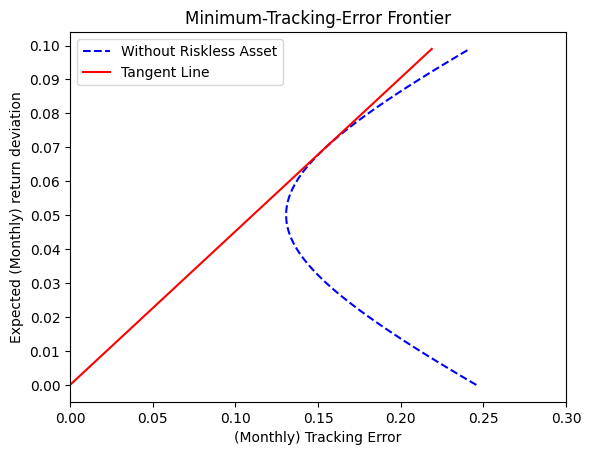

In [33]:
plt.plot(Minimum_tracking_error_frontier["SD"], Minimum_tracking_error_frontier.index, color='blue', linestyle='--', label = "Without Riskless Asset")
plt.plot(Minimum_tracking_error_frontier["Riskless_SD"], Minimum_tracking_error_frontier.index, color='red', linestyle='-', label = "Tangent Line")

plt.yticks(np.arange(0, 0.11, 0.01))
plt.xlim(0,0.3)
plt.xlabel('(Monthly) Tracking Error')
plt.ylabel('Expected (Monthly) return deviation')
plt.title('Minimum-Tracking-Error Frontier')
plt.legend()
plt.show()

### Information ratio for the tangency portfolio

In [34]:
Information_ratio = np.sqrt(Zeta - 2*Alpha*rf + Delta*rf**2)
Information_ratio

0.4524875396199336

In [35]:
print (f'The Information ratio of the tangency portfolio is {Information_ratio:.3f}')

The Information ratio of the tangency portfolio is 0.452


In [36]:
# Return deviation of tangency portfolio

R_tg = (Alpha*rf - Zeta)/(Delta*rf - Alpha)
R_tg

0.06982811859065617

In [37]:
# Session 2 Slide 29
# Variance of return deviation for tangency portfolio

Variance_tg=(Zeta-2*Alpha*rf+Delta*rf**2)/((Delta**2)*(rf-R_minimum_tracking_error)**2)
Variance_tg

0.02381482711047659

In [38]:
# Session 2 Slide 29
# Standard Deviation of return deviation (Tracking error) for tangency portfolio

StdDev_tg=-((Zeta-2*Alpha*rf+Delta*rf**2)**0.5)/(Delta*(rf-R_minimum_tracking_error))
StdDev_tg

0.15432053366443685

In [39]:
# Double check information ratio of tangency portfolio

Verify_Information_Ratio=(R_tg-rf)/StdDev_tg
Verify_Information_Ratio

0.45248753961993365

In [40]:
w_star = a + b*R_tg

In [41]:
Tangency_portfolio=pd.DataFrame(data=w_star,index=Industry_Portfolio.columns,columns=["Optimal_Weights"])
Tangency_portfolio

,Optimal_Weights
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


# Part 2: Minimum-Variance Frontier w/o Short Sales

In [42]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx",index_col=0)

In [43]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [44]:
Summary = pd.DataFrame({"Mean":Industry_Portfolio.mean(),"Std":Industry_Portfolio.std()})
Summary

,Mean,Std
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [45]:
V=Industry_Portfolio.cov()

V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

In [46]:
# initialize variables
n_simulations = 100000

In [47]:
# This is using (standard) uniform distribution in the range [0, 1]. 

# Create dataframe to store simulation results
Simulation_df = pd.DataFrame(index=range(n_simulations), 
                             columns=Summary.index)

# Add columns for Return and Std
Simulation_df["Return"] = np.nan
Simulation_df["Std"] = np.nan

# Generate random weights for all simulations and industries at once
random_weights = np.random.uniform(0, 1, (n_simulations, len(Simulation_df.columns) - 2))           # Can change portfolio weight constraint here

# Normalize weights so that the sum of each row equals 1
random_weights = random_weights / random_weights.sum(axis=1, keepdims=True)

# Store weights in the DataFrame (for all rows at once)
Simulation_df.iloc[:, :-2] = random_weights

# Calculate the returns for all simulations at once using a dot product
Simulation_df["Return"] = np.dot(random_weights, Summary["Mean"])

# Calculate the standard deviation (portfolio volatility) for all simulations
Simulation_df["Std"] = np.sqrt(np.einsum('ij,ik,jk->i', random_weights, random_weights, V))

# # Step 1: Calculate the intermediate product V @ weights.T (covariance matrix times the weights)
# intermediate_product = np.dot(random_weights, V)  # Shape: (n_simulations, n_assets)

# # Step 2: Compute the dot product of weights with the intermediate product to get variance
# variances = np.sum(random_weights * intermediate_product, axis=1)

# # Step 3: Calculate the standard deviation (volatility) as the square root of the variance
# Simulation_df["Std"] = np.sqrt(variances)

In [48]:
Simulation_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Return,Std
0,0.11596,0.048613,0.112546,0.10427,0.07398,0.136462,0.144168,0.04545,0.101373,0.117178,0.876676,4.120402
1,0.096225,0.039959,0.129425,0.10306,0.098539,0.11492,0.056448,0.071162,0.149796,0.140466,0.863040,4.120748
2,0.077634,0.138479,0.126979,0.017889,0.130514,0.015961,0.19342,0.186866,0.098367,0.013891,0.856088,4.239529
3,0.088498,0.109451,0.11439,0.185914,0.067792,0.095036,0.182167,0.031032,0.029516,0.096204,0.905701,4.488969
4,0.150232,0.205437,0.040705,0.134992,0.181178,0.008434,0.079199,0.00743,0.15017,0.042223,0.875251,4.579149
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.137741,0.082307,0.016987,0.142969,0.185648,0.040788,0.065479,0.066685,0.089077,0.17232,0.833500,4.306121
99996,0.080697,0.145874,0.094624,0.097796,0.147476,0.143097,0.167673,0.002573,0.0482,0.07199,0.869799,4.617786
99997,0.014583,0.165022,0.112791,0.044599,0.017121,0.157921,0.146687,0.009587,0.138982,0.192708,0.817901,4.663892
99998,0.109615,0.093625,0.122837,0.07716,0.115122,0.162808,0.149237,0.119405,0.021322,0.02887,0.882553,4.258421


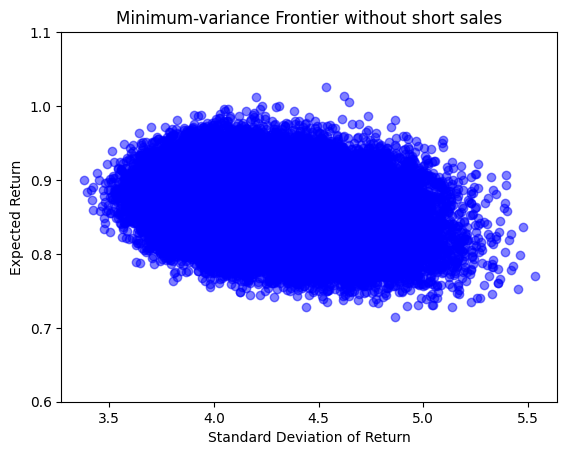

In [49]:
# Scatter plot
plt.scatter(Simulation_df["Std"], Simulation_df["Return"], color='blue',alpha=0.5)

# Set y-axis ticks in increments of 0.1%
plt.yticks(np.arange(0.6, 1.2, 0.1))

# Labeling the axes and setting title
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier without short sales')

# Show the plot
plt.show()

In [50]:
# This is using ONE DIVIDED BY (standard) uniform distribution in the range [0, 1]. 

# Create dataframe to store simulation results
Simulation2_df = pd.DataFrame(index=range(n_simulations), 
                              columns=Summary.index)

# Add columns for Return and Std
Simulation2_df["Return"] = np.nan
Simulation2_df["Std"] = np.nan

# Generate random weights for all simulations and industries at once
random_weights = 1 / np.random.uniform(0, 1, (n_simulations, len(Simulation2_df.columns) - 2))          # Can change portfolio weight constraint here

# Normalize the weights so that they sum to 1 for each simulation
random_weights = random_weights / random_weights.sum(axis=1, keepdims=True)

# Store weights in the dataframe (for all rows at once)
Simulation2_df.iloc[:, :-2] = random_weights

# Calculate returns for all simulations at once
Simulation2_df["Return"] = np.dot(random_weights, Summary["Mean"])

# Calculate standard deviation (portfolio volatility) for all simulations at once
# This uses the formula sqrt(w.T @ V @ w), applied to all simulations
Simulation2_df["Std"] = np.sqrt(np.einsum('ij,ik,jk->i', random_weights, random_weights, V))

# # Step 1: Calculate the intermediate product V @ weights.T (covariance matrix times the weights)
# intermediate_product = np.dot(random_weights, V)  # Shape: (n_simulations, n_assets)

# # Step 2: Compute the dot product of weights with the intermediate product to get variance
# variances = np.sum(random_weights * intermediate_product, axis=1)

# # Step 3: Calculate the standard deviation (volatility) as the square root of the variance
# Simulation2_df["Std"] = np.sqrt(variances)

In [51]:
Simulation2_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Return,Std
0,0.1497,0.045616,0.029597,0.028089,0.101053,0.118426,0.058096,0.032477,0.034223,0.402723,0.721682,4.520545
1,0.404256,0.059846,0.020906,0.022786,0.026406,0.026804,0.0172,0.016433,0.384788,0.020576,0.889721,3.422957
2,0.020669,0.044559,0.220178,0.06673,0.061576,0.29856,0.152499,0.02191,0.072376,0.040944,0.909430,4.314785
3,0.095277,0.233852,0.159257,0.068226,0.067811,0.072252,0.087507,0.083349,0.065755,0.066713,0.856250,4.825794
4,0.058393,0.224629,0.213596,0.043251,0.066184,0.041754,0.056755,0.073512,0.17527,0.046657,0.865995,4.718572
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.72085,0.026559,0.008847,0.012639,0.016054,0.012199,0.048417,0.010243,0.007965,0.136228,0.844106,3.618005
99996,0.032783,0.025812,0.066751,0.030239,0.020162,0.643963,0.031157,0.081942,0.02868,0.038512,0.874043,4.210804
99997,0.137622,0.01767,0.039043,0.064168,0.146252,0.487062,0.022943,0.031465,0.034736,0.019039,0.883633,4.113168
99998,0.056114,0.05463,0.195802,0.27682,0.062512,0.123256,0.069454,0.065656,0.049055,0.046701,0.968838,4.459888


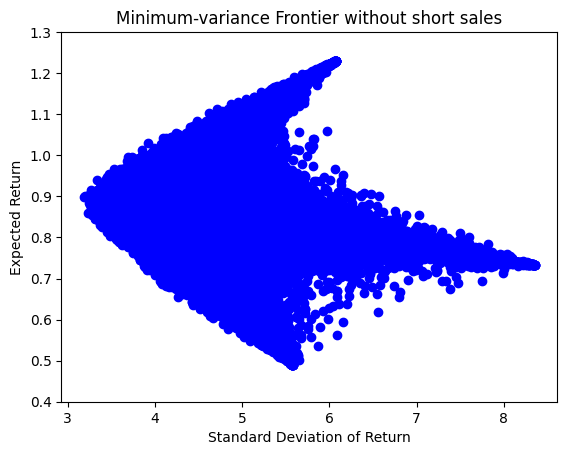

In [52]:
# Scatter plot
plt.scatter(Simulation2_df["Std"], Simulation2_df["Return"], color='blue')

# Set y-axis ticks in increments of 0.1%
plt.yticks(np.arange(0.4, 1.4, 0.1))

# Labeling the axes and setting title
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier without short sales')

# Show the plot
plt.show()